In [115]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandasql as ps

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [116]:
#Step -2
#Load the data
bsdata=pd.read_csv(r"C:\Users\Dlc\Desktop\INTERNSHIP 26-07\PROJECT\full_data.csv",header=0)
#Step -3
#Copy to back_up file
bsdata_bk=bsdata.copy()
#Display first 5 records
bsdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [117]:
#Step -4
#Display the data set information
bsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [118]:
bsdata.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [119]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

stroke_count = bsdata.stroke.value_counts()
print("proportion: ",stroke_count[0]/stroke_count[1],":1")

proportion:  19.08467741935484 :1


In [120]:
#Step -5
#Display the unique values of the data set
bsdata.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [121]:
# Count the missig values by each variable, if available
bsdata.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [122]:
#Step -6
#Check the duplicate  values with in  dataset if available
bsdata_dup=bsdata[bsdata.duplicated(keep='last')]
bsdata_dup

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [123]:
#Step 7
# plotting histogram for the target variable.

#sns.histplot(bsdata['stroke'],kde=True)

In [124]:
'''
Based on analysis:-
1) ## Females are more likely to get a stroke than male.
2) ### People who are employed in the private sector are more likely to get a stroke.
3) There is no clear relation between heart diseases and hypertension with stroke.
4) Smoking is not a conclusive evidence to determine stroke.
5) ### People who are obese,overweight are more likely to get a stroke.
6) ## People with low glucose level are likely to get a stroke.
7) ## Senior and super senior citizens are more likely to get a stroke.
8) Marriage doesn't determine stroke.

'''

"\nBased on analysis:-\n1) ## Females are more likely to get a stroke than male.\n2) ### People who are employed in the private sector are more likely to get a stroke.\n3) There is no clear relation between heart diseases and hypertension with stroke.\n4) Smoking is not a conclusive evidence to determine stroke.\n5) ### People who are obese,overweight are more likely to get a stroke.\n6) ## People with low glucose level are likely to get a stroke.\n7) ## Senior and super senior citizens are more likely to get a stroke.\n8) Marriage doesn't determine stroke.\n\n"

In [125]:
#Display the unique values by count for 'gender'
bsdata['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [126]:
#Display the unique values by count for 'work_type'
bsdata['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [127]:
#Display the unique values by count for 'ever_married'
bsdata['ever_married'].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [128]:
#Display the unique values by count for 'Residence_type'
bsdata['Residence_type'].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [129]:
#Display the unique values by count for 'smoking_status'
bsdata['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [130]:
#Step -8,9
#use LabelEncoder for target variable
object_col = ["gender", "ever_married", "Residence_type","smoking_status","work_type"]
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in object_col:
    bsdata[col] = LE.fit_transform(bsdata[col])

In [131]:
bsdata['gender'].value_counts()

0    2907
1    2074
Name: gender, dtype: int64

In [132]:
bsdata['ever_married'].value_counts()

1    3280
0    1701
Name: ever_married, dtype: int64

In [133]:
bsdata['Residence_type'].value_counts()

1    2532
0    2449
Name: Residence_type, dtype: int64

In [134]:
bsdata['smoking_status'].value_counts()

2    1838
0    1500
1     867
3     776
Name: smoking_status, dtype: int64

In [135]:
bsdata['work_type'].value_counts()

1    2860
2     804
3     673
0     644
Name: work_type, dtype: int64

In [136]:
#Display the data set information
bsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   int32  
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int32  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 330.9 KB


In [137]:
#Display the dataset
bsdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [138]:
# Display descriptive statistics
bsdata.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [139]:
# Finding Correlation Between Target and Remaining Variables
bsdata.corrwith(bsdata['stroke'])

gender               0.008870
age                  0.246478
hypertension         0.131965
heart_disease        0.134610
ever_married         0.108398
work_type           -0.041835
Residence_type       0.016494
avg_glucose_level    0.133227
bmi                  0.056926
smoking_status       0.027463
stroke               1.000000
dtype: float64

In [140]:
#have very low correlation with the target variable so dropping them
#dropping the columns
#badata = bsdata.drop(['gender','work_type','Residence_type','bmi','smoking_status'],axis=1)

In [141]:
#Identify the variables to normalize with minmaxscalar
cols=['age','gender','hypertension','ever_married','heart_disease','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

In [142]:
#Step -10
# identify the Independent and Target (dependent variables)
IndepVar = []
for col in bsdata.columns:
    if col != 'stroke':
        IndepVar.append(col)
TargetVar = 'stroke'
x = bsdata[IndepVar]
y = bsdata[TargetVar]

In [143]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.125)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)

print(y_over.shape)

(5324, 10)
(5324,)


In [144]:
#Step -11
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3726, 10), (1598, 10), (3726,), (1598,))

In [145]:
#Step -12
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)


In [146]:
stroke_count = y_train.value_counts()
print("proportion: ",stroke_count[0]/stroke_count[1],":1")

proportion:  8.315 :1


In [147]:
#Load the result file for SVM
SVMResults=pd.read_csv(r"C:\Users\Dlc\Desktop\INTERNSHIP 26-07\PROJECT\EMResults.csv",header=0)
#Display the  first five records
SVMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM- Linear Kernel

Model Name:  SVM - Linear
Confusion matrix : 
 [[   0  191]
 [   0 1407]]
Outcome values : 
 0 191 0 1407
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       191
           0       0.88      1.00      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.44      0.50      0.47      1598
weighted avg       0.78      0.88      0.82      1598

Accuracy : 88.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


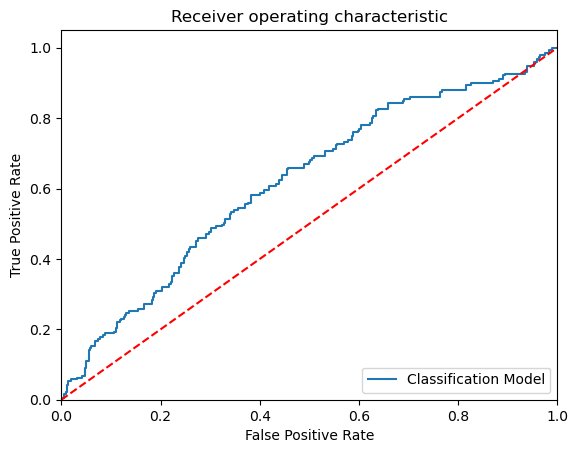

In [148]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = SVMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [149]:
#Display the results of SVM Algorithm
SVMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,191,0,1407,0.88,NaN,0.0,0.0,1.0,NaN,0.5,0.5


# Polynomial Kernel

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[   0  191]
 [   0 1407]]
Outcome values : 
 0 191 0 1407
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       191
           0       0.88      1.00      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.44      0.50      0.47      1598
weighted avg       0.78      0.88      0.82      1598

Accuracy : 88.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


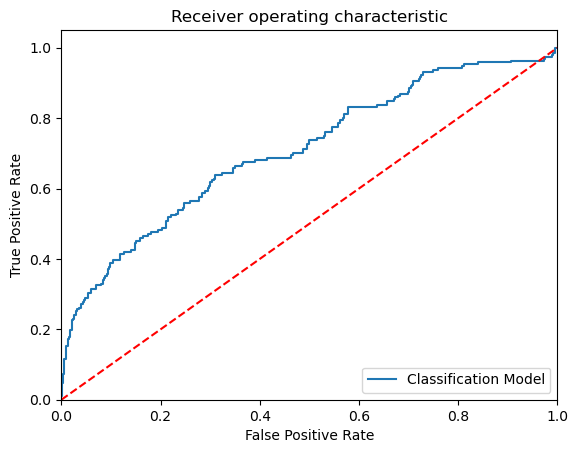

In [150]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
new_row = {'Model Name' : "SVM - Polynomial",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = SVMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [151]:
#Display the results of SVM Algorithm
SVMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,191,0,1407,0.88,NaN,0.0,0.0,1.0,NaN,0.5,0.5
1,SVM - Polynomial,0,191,0,1407,0.88,NaN,0.0,0.0,1.0,NaN,0.5,0.5


# Gaussian Kernel

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 162   29]
 [ 386 1021]]
Outcome values : 
 162 29 386 1021
Classification report : 
               precision    recall  f1-score   support

           1       0.30      0.85      0.44       191
           0       0.97      0.73      0.83      1407

    accuracy                           0.74      1598
   macro avg       0.63      0.79      0.63      1598
weighted avg       0.89      0.74      0.78      1598

Accuracy : 74.0 %
Precision : 29.6 %
Recall : 84.8 %
F1 Score : 0.438
Specificity or True Negative Rate : 72.6 %
Balanced Accuracy : 78.7 %
MCC : 0.392
roc_auc_score: 0.787


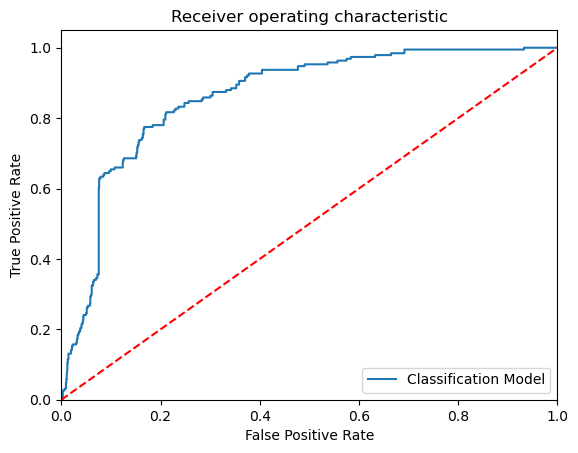

In [152]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = SVMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# Sigmoid Kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 84 107]
 [794 613]]
Outcome values : 
 84 107 794 613
Classification report : 
               precision    recall  f1-score   support

           1       0.10      0.44      0.16       191
           0       0.85      0.44      0.58      1407

    accuracy                           0.44      1598
   macro avg       0.47      0.44      0.37      1598
weighted avg       0.76      0.44      0.53      1598

Accuracy : 43.6 %
Precision : 9.6 %
Recall : 44.0 %
F1 Score : 0.157
Specificity or True Negative Rate : 43.6 %
Balanced Accuracy : 43.8 %
MCC : -0.081
roc_auc_score: 0.438


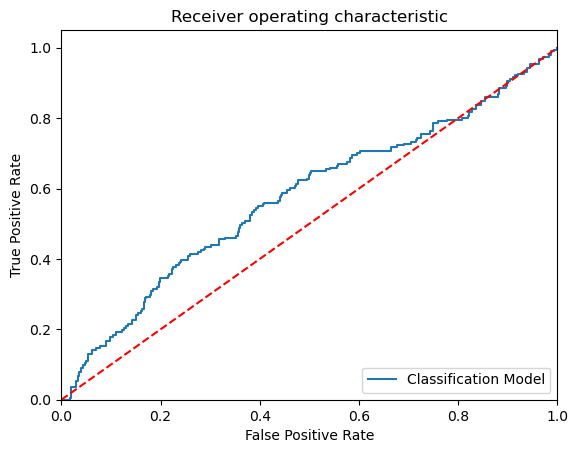

In [153]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = SVMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [154]:
#Display the results of SVM Algorithm
SVMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,191,0,1407,0.880,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,SVM - Polynomial,0,191,0,1407,0.880,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
2,SVM - Gaussian,162,29,386,1021,0.740,0.296,0.848,0.438,0.726,0.392,0.786912,0.787
3,SVM - Sigmoid,84,107,794,613,0.436,0.096,0.440,0.157,0.436,-0.081,0.437735,0.438


In [155]:
#Load the result file for KNN
KNNResults=pd.read_csv(r"C:\Users\Dlc\Desktop\INTERNSHIP 26-07\PROJECT\KNN_Results.csv",header=0)
#Display the  first five records
KNNResults.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 161   30]
 [  78 1329]]
Outcome values : 
 161 30 78 1329
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.84      0.75       191
           0       0.98      0.94      0.96      1407

    accuracy                           0.93      1598
   macro avg       0.83      0.89      0.85      1598
weighted avg       0.94      0.93      0.94      1598

Accuracy : 93.2 %
Precision : 67.4 %
Recall : 84.3 %
F1 Score : 0.749
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 89.4 %
MCC : 0.716
roc_auc_score: 0.894


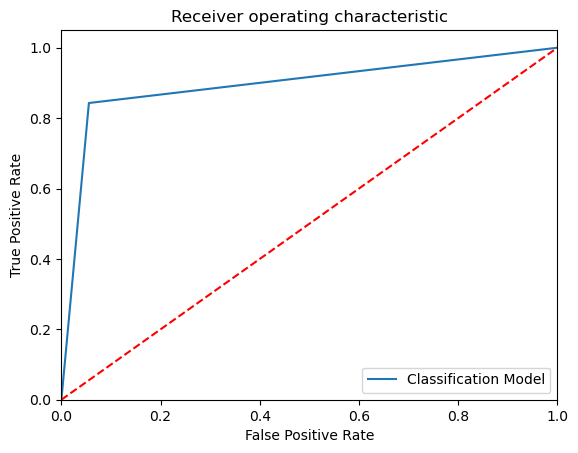

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  87  104]
 [  56 1351]]
Outcome values : 
 87 104 56 1351
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.46      0.52       191
           0       0.93      0.96      0.94      1407

    accuracy                           0.90      1598
   macro avg       0.77      0.71      0.73      1598
weighted avg       0.89      0.90      0.89      1598

Accuracy : 90.0 %
Precision : 60.8 %
Recall : 45.5 %
F1 Score : 0.521
Specificity or True Negative Rate : 96.0 %
Balanced Accuracy : 70.8 %
MCC : 0.472
roc_auc_score: 0.708


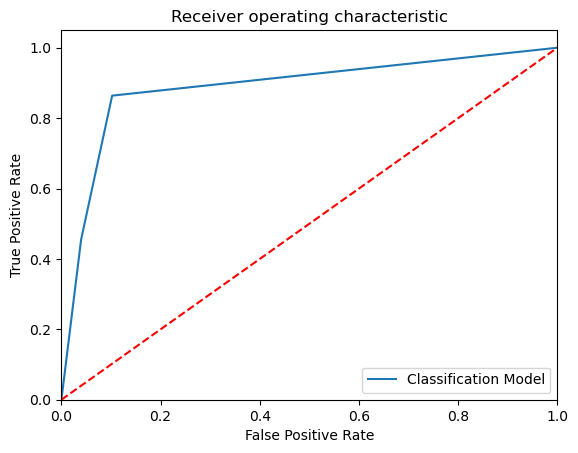

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[  97   94]
 [  97 1310]]
Outcome values : 
 97 94 97 1310
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.51      0.50       191
           0       0.93      0.93      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.72      0.72      0.72      1598
weighted avg       0.88      0.88      0.88      1598

Accuracy : 88.0 %
Precision : 50.0 %
Recall : 50.8 %
F1 Score : 0.504
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 72.0 %
MCC : 0.436
roc_auc_score: 0.719


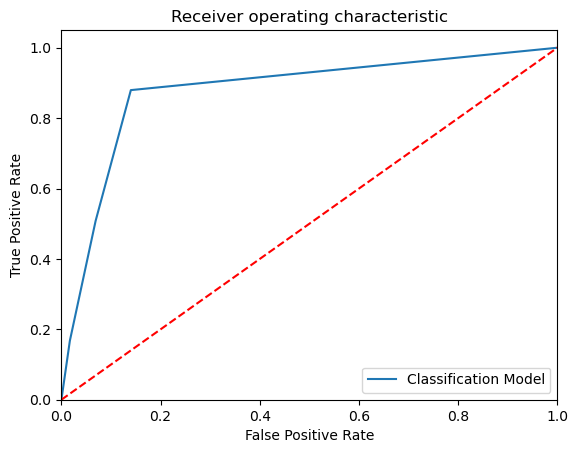

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  48  143]
 [  48 1359]]
Outcome values : 
 48 143 48 1359
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.25      0.33       191
           0       0.90      0.97      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.70      0.61      0.63      1598
weighted avg       0.86      0.88      0.86      1598

Accuracy : 88.0 %
Precision : 50.0 %
Recall : 25.1 %
F1 Score : 0.334
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 60.8 %
MCC : 0.297
roc_auc_score: 0.609


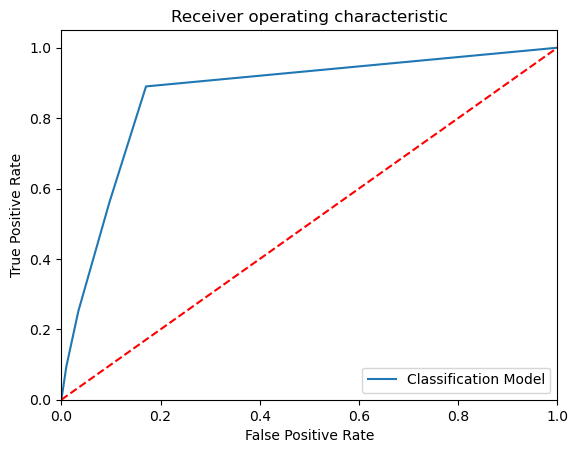

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  65  126]
 [  77 1330]]
Outcome values : 
 65 126 77 1330
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.34      0.39       191
           0       0.91      0.95      0.93      1407

    accuracy                           0.87      1598
   macro avg       0.69      0.64      0.66      1598
weighted avg       0.86      0.87      0.86      1598

Accuracy : 87.3 %
Precision : 45.8 %
Recall : 34.0 %
F1 Score : 0.39
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 64.2 %
MCC : 0.326
roc_auc_score: 0.643


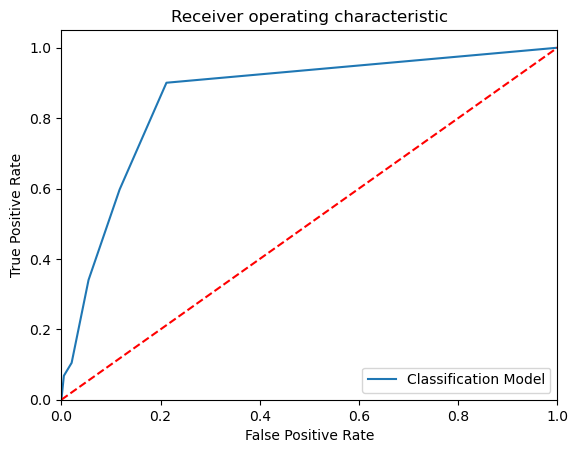

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[  39  152]
 [  44 1363]]
Outcome values : 
 39 152 44 1363
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.20      0.28       191
           0       0.90      0.97      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.68      0.59      0.61      1598
weighted avg       0.85      0.88      0.86      1598

Accuracy : 87.7 %
Precision : 47.0 %
Recall : 20.4 %
F1 Score : 0.285
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 58.6 %
MCC : 0.253
roc_auc_score: 0.586


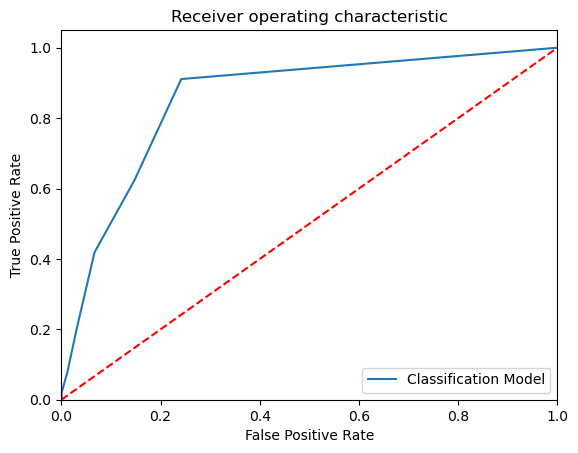

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[  57  134]
 [  56 1351]]
Outcome values : 
 57 134 56 1351
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.30      0.38       191
           0       0.91      0.96      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.71      0.63      0.65      1598
weighted avg       0.86      0.88      0.87      1598

Accuracy : 88.1 %
Precision : 50.4 %
Recall : 29.8 %
F1 Score : 0.375
Specificity or True Negative Rate : 96.0 %
Balanced Accuracy : 62.9 %
MCC : 0.327
roc_auc_score: 0.629


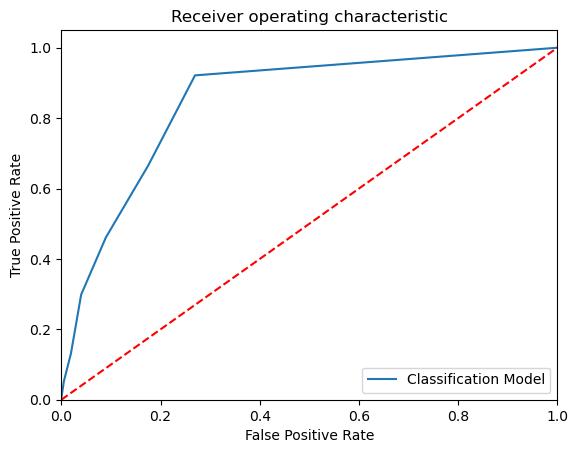

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[  37  154]
 [  36 1371]]
Outcome values : 
 37 154 36 1371
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.19      0.28       191
           0       0.90      0.97      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.70      0.58      0.61      1598
weighted avg       0.85      0.88      0.86      1598

Accuracy : 88.1 %
Precision : 50.7 %
Recall : 19.4 %
F1 Score : 0.28
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 58.4 %
MCC : 0.261
roc_auc_score: 0.584


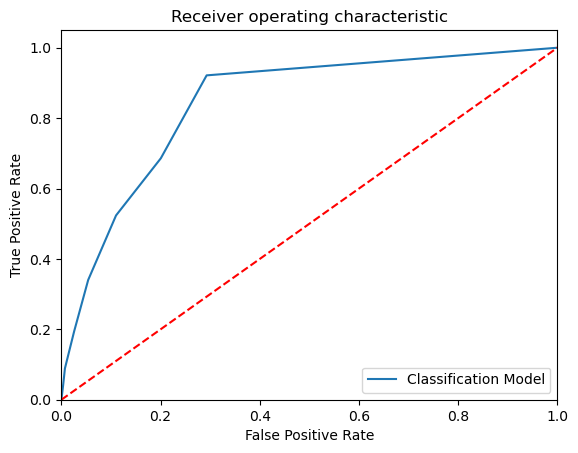

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[  45  146]
 [  51 1356]]
Outcome values : 
 45 146 51 1356
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.24      0.31       191
           0       0.90      0.96      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.69      0.60      0.62      1598
weighted avg       0.85      0.88      0.86      1598

Accuracy : 87.7 %
Precision : 46.9 %
Recall : 23.6 %
F1 Score : 0.314
Specificity or True Negative Rate : 96.4 %
Balanced Accuracy : 60.0 %
MCC : 0.272
roc_auc_score: 0.6


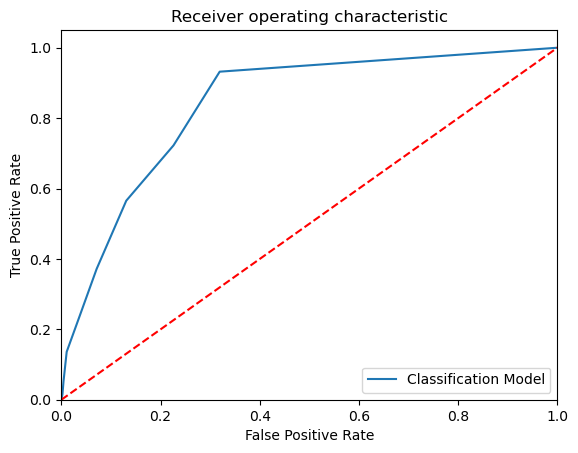

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[  31  160]
 [  23 1384]]
Outcome values : 
 31 160 23 1384
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.16      0.25       191
           0       0.90      0.98      0.94      1407

    accuracy                           0.89      1598
   macro avg       0.74      0.57      0.60      1598
weighted avg       0.86      0.89      0.86      1598

Accuracy : 88.5 %
Precision : 57.4 %
Recall : 16.2 %
F1 Score : 0.253
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 57.3 %
MCC : 0.262
roc_auc_score: 0.573


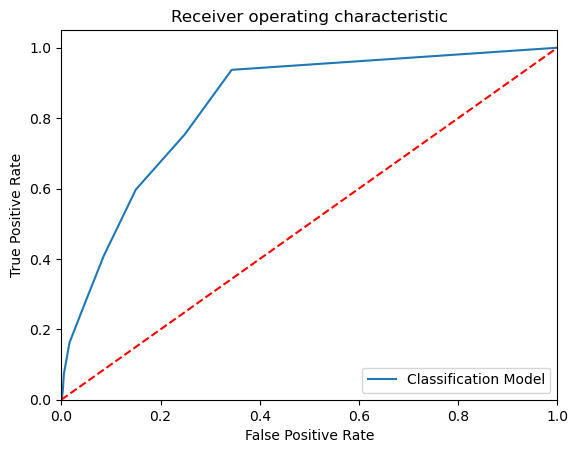

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[  38  153]
 [  33 1374]]
Outcome values : 
 38 153 33 1374
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.20      0.29       191
           0       0.90      0.98      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.72      0.59      0.61      1598
weighted avg       0.86      0.88      0.86      1598

Accuracy : 88.4 %
Precision : 53.5 %
Recall : 19.9 %
F1 Score : 0.29
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 58.8 %
MCC : 0.276
roc_auc_score: 0.588


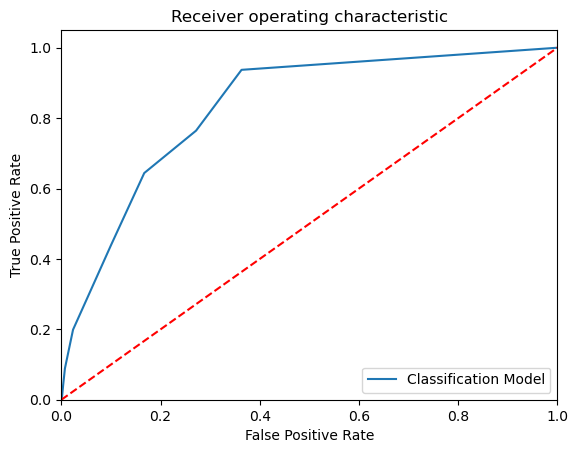

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[  24  167]
 [  19 1388]]
Outcome values : 
 24 167 19 1388
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.13      0.21       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.73      0.56      0.57      1598
weighted avg       0.85      0.88      0.85      1598

Accuracy : 88.4 %
Precision : 55.8 %
Recall : 12.6 %
F1 Score : 0.205
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 55.6 %
MCC : 0.225
roc_auc_score: 0.556


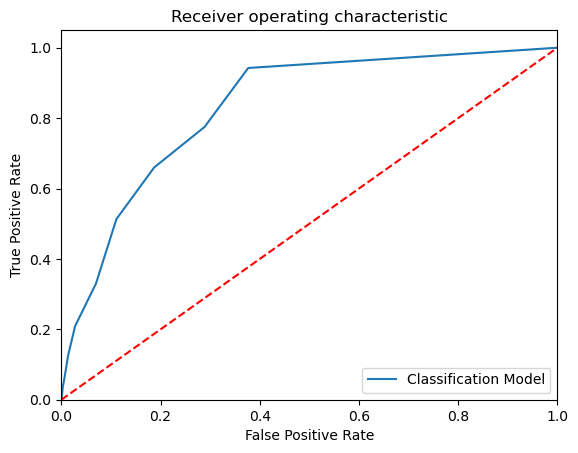

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[  25  166]
 [  24 1383]]
Outcome values : 
 25 166 24 1383
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.13      0.21       191
           0       0.89      0.98      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.70      0.56      0.57      1598
weighted avg       0.85      0.88      0.85      1598

Accuracy : 88.1 %
Precision : 51.0 %
Recall : 13.1 %
F1 Score : 0.208
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 55.7 %
MCC : 0.214
roc_auc_score: 0.557


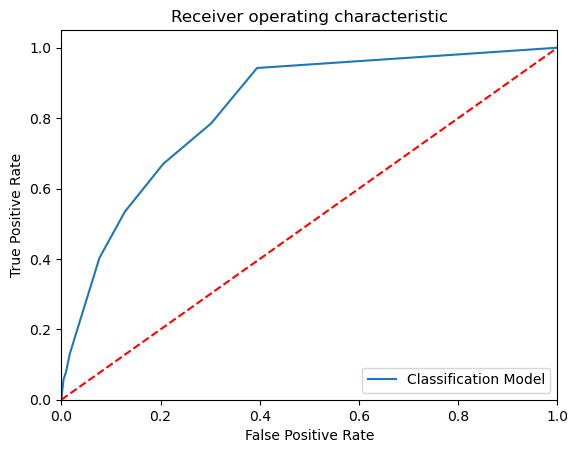

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[  16  175]
 [  15 1392]]
Outcome values : 
 16 175 15 1392
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.08      0.14       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.70      0.54      0.54      1598
weighted avg       0.84      0.88      0.84      1598

Accuracy : 88.1 %
Precision : 51.6 %
Recall : 8.4 %
F1 Score : 0.144
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 53.6 %
MCC : 0.172
roc_auc_score: 0.537


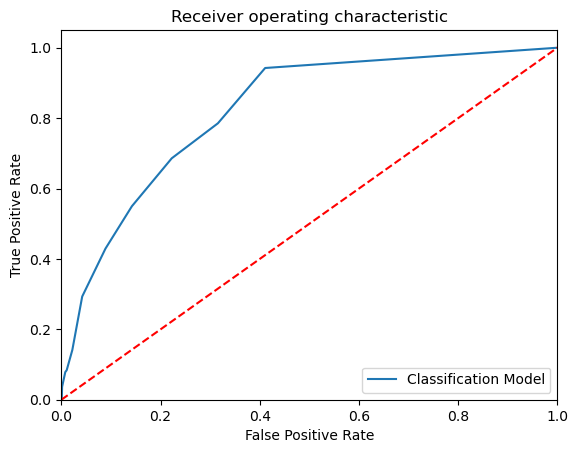

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[  17  174]
 [  20 1387]]
Outcome values : 
 17 174 20 1387
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.09      0.15       191
           0       0.89      0.99      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.67      0.54      0.54      1598
weighted avg       0.84      0.88      0.84      1598

Accuracy : 87.9 %
Precision : 45.9 %
Recall : 8.9 %
F1 Score : 0.149
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 53.8 %
MCC : 0.161
roc_auc_score: 0.537


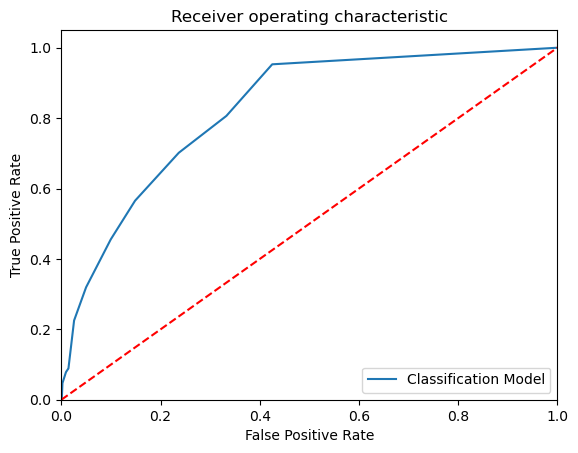

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[  15  176]
 [  16 1391]]
Outcome values : 
 15 176 16 1391
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.08      0.14       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.69      0.53      0.54      1598
weighted avg       0.84      0.88      0.84      1598

Accuracy : 88.0 %
Precision : 48.4 %
Recall : 7.9 %
F1 Score : 0.135
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 53.4 %
MCC : 0.158
roc_auc_score: 0.534


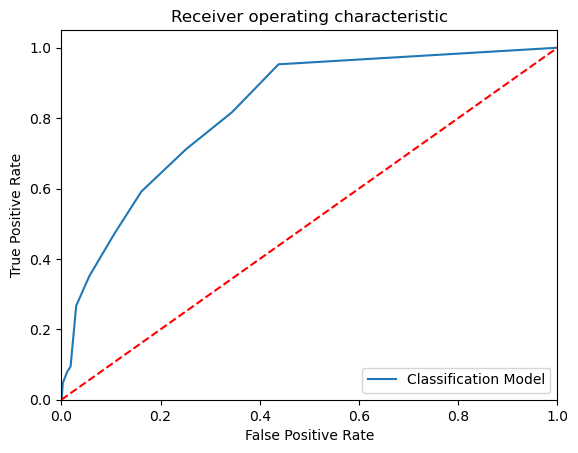

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[  15  176]
 [  17 1390]]
Outcome values : 
 15 176 17 1390
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.08      0.13       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.68      0.53      0.53      1598
weighted avg       0.84      0.88      0.84      1598

Accuracy : 87.9 %
Precision : 46.9 %
Recall : 7.9 %
F1 Score : 0.135
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 53.4 %
MCC : 0.154
roc_auc_score: 0.533


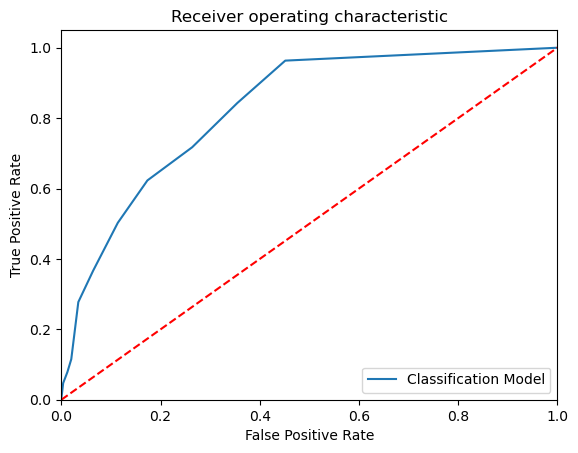

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[   9  182]
 [   6 1401]]
Outcome values : 
 9 182 6 1401
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.05      0.09       191
           0       0.89      1.00      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.74      0.52      0.51      1598
weighted avg       0.85      0.88      0.84      1598

Accuracy : 88.2 %
Precision : 60.0 %
Recall : 4.7 %
F1 Score : 0.087
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 52.2 %
MCC : 0.144
roc_auc_score: 0.521


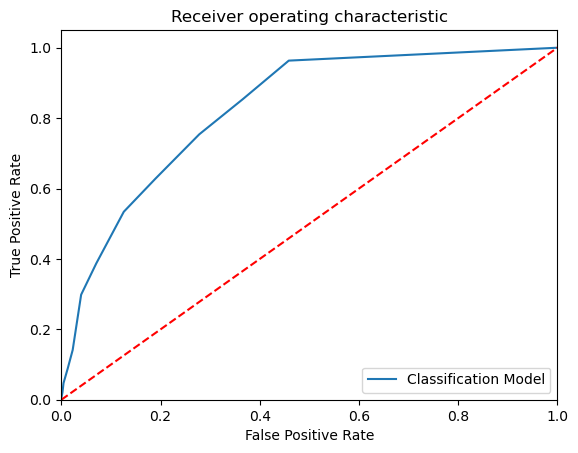

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[  11  180]
 [   8 1399]]
Outcome values : 
 11 180 8 1399
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.06      0.10       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.73      0.53      0.52      1598
weighted avg       0.85      0.88      0.84      1598

Accuracy : 88.2 %
Precision : 57.9 %
Recall : 5.8 %
F1 Score : 0.105
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 52.6 %
MCC : 0.155
roc_auc_score: 0.526


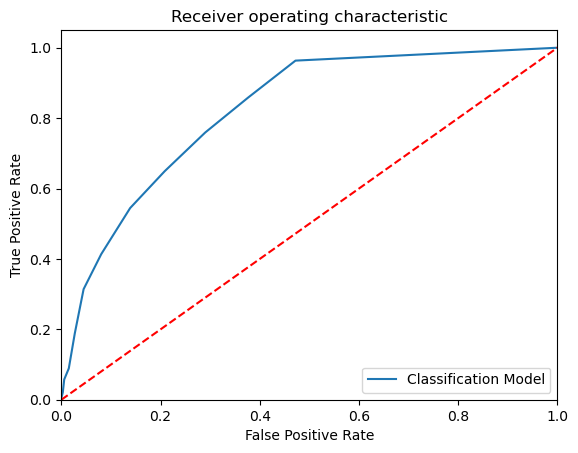

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[   6  185]
 [   5 1402]]
Outcome values : 
 6 185 5 1402
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.03      0.06       191
           0       0.88      1.00      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.71      0.51      0.50      1598
weighted avg       0.84      0.88      0.83      1598

Accuracy : 88.1 %
Precision : 54.5 %
Recall : 3.1 %
F1 Score : 0.059
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 51.4 %
MCC : 0.109
roc_auc_score: 0.514


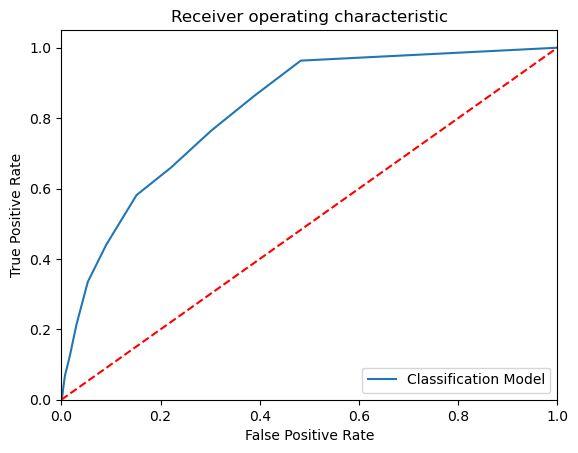

In [156]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNNResults = KNNResults.append(new_row, ignore_index=True)

In [157]:
#Display the results of KNN Algorithm
KNNResults

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,161,30,78,1329,0.932,0.674,0.843,0.749,0.945,0.716,0.893747,0.894
1,KNeighborsClassifier(n_neighbors=2),2,87,104,56,1351,0.900,0.608,0.455,0.521,0.960,0.472,0.707848,0.708
2,KNeighborsClassifier(n_neighbors=3),3,97,94,97,1310,0.880,0.500,0.508,0.504,0.931,0.436,0.719456,0.720
3,KNeighborsClassifier(n_neighbors=4),4,48,143,48,1359,0.880,0.500,0.251,0.334,0.966,0.297,0.608597,0.608
4,KNeighborsClassifier(),5,65,126,77,1330,0.873,0.458,0.340,0.390,0.945,0.326,0.642794,0.642
5,KNeighborsClassifier(n_neighbors=6),6,39,152,44,1363,0.877,0.470,0.204,0.285,0.969,0.253,0.586458,0.586
6,KNeighborsClassifier(n_neighbors=7),7,57,134,56,1351,0.881,0.504,0.298,0.375,0.960,0.327,0.629314,0.629
7,KNeighborsClassifier(n_neighbors=8),8,37,154,36,1371,0.881,0.507,0.194,0.280,0.974,0.261,0.584065,0.584
8,KNeighborsClassifier(n_neighbors=9),9,45,146,51,1356,0.877,0.469,0.236,0.314,0.964,0.272,0.599677,0.600
9,KNeighborsClassifier(n_neighbors=10),10,31,160,23,1384,0.885,0.574,0.162,0.253,0.984,0.262,0.572978,0.573


# Compare the classification Algorithms

In [158]:
# Load the results file for classification
EMResults = pd.read_csv(r"C:\Users\Dlc\Desktop\INTERNSHIP 26-07\PROJECT\EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  18  173]
 [   5 1402]]
Outcome values : 
 18 173 5 1402
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.09      0.17       191
           0       0.89      1.00      0.94      1407

    accuracy                           0.89      1598
   macro avg       0.84      0.55      0.55      1598
weighted avg       0.88      0.89      0.85      1598

Accuracy : 88.9 %
Precision : 78.3 %
Recall : 9.4 %
F1 Score : 0.168
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 54.5 %
MCC : 0.247
roc_auc_score: 0.545


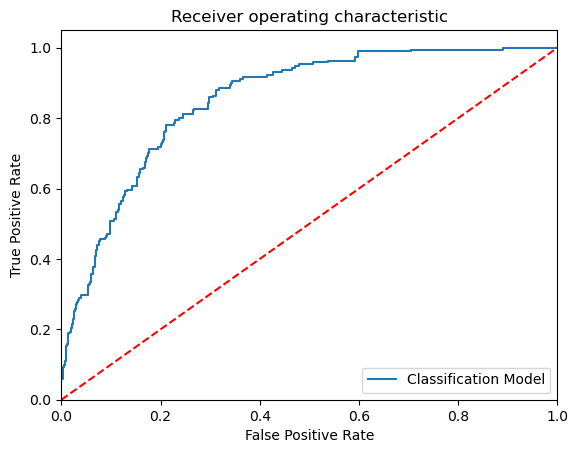

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 158   33]
 [  90 1317]]
Outcome values : 
 158 33 90 1317
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.83      0.72       191
           0       0.98      0.94      0.96      1407

    accuracy                           0.92      1598
   macro avg       0.81      0.88      0.84      1598
weighted avg       0.94      0.92      0.93      1598

Accuracy : 92.3 %
Precision : 63.7 %
Recall : 82.7 %
F1 Score : 0.72
Specificity or True Negative Rate : 93.6 %
Balanced Accuracy : 88.2 %
MCC : 0.684
roc_auc_score: 0.882


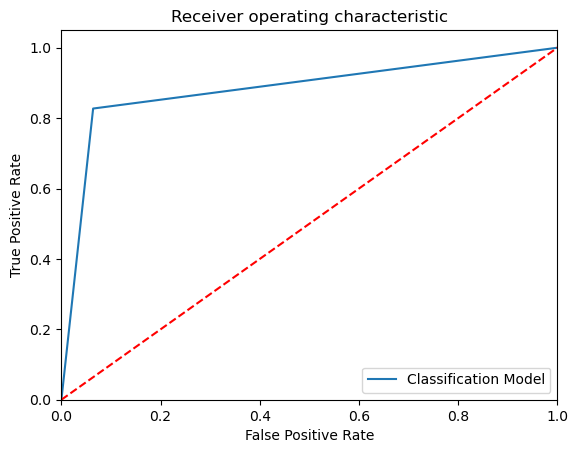

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 152   39]
 [   7 1400]]
Outcome values : 
 152 39 7 1400
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.80      0.87       191
           0       0.97      1.00      0.98      1407

    accuracy                           0.97      1598
   macro avg       0.96      0.90      0.93      1598
weighted avg       0.97      0.97      0.97      1598

Accuracy : 97.1 %
Precision : 95.6 %
Recall : 79.6 %
F1 Score : 0.869
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 89.6 %
MCC : 0.857
roc_auc_score: 0.895


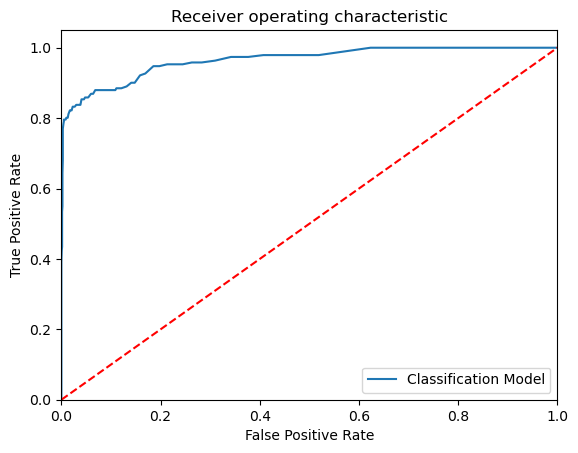

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 159   32]
 [  22 1385]]
Outcome values : 
 159 32 22 1385
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.83      0.85       191
           0       0.98      0.98      0.98      1407

    accuracy                           0.97      1598
   macro avg       0.93      0.91      0.92      1598
weighted avg       0.97      0.97      0.97      1598

Accuracy : 96.6 %
Precision : 87.8 %
Recall : 83.2 %
F1 Score : 0.855
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 90.8 %
MCC : 0.836
roc_auc_score: 0.908


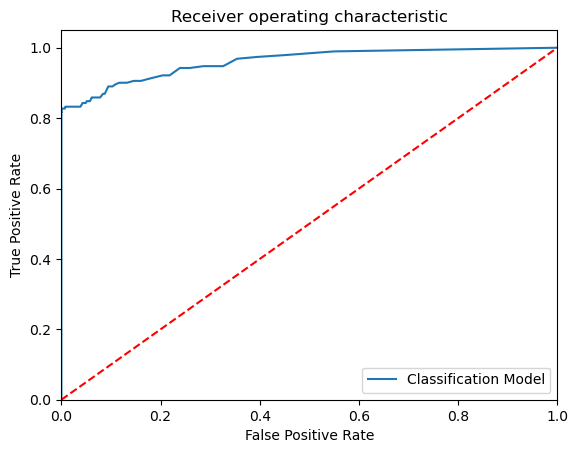

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 161   30]
 [  78 1329]]
Outcome values : 
 161 30 78 1329
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.84      0.75       191
           0       0.98      0.94      0.96      1407

    accuracy                           0.93      1598
   macro avg       0.83      0.89      0.85      1598
weighted avg       0.94      0.93      0.94      1598

Accuracy : 93.2 %
Precision : 67.4 %
Recall : 84.3 %
F1 Score : 0.749
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 89.4 %
MCC : 0.716
roc_auc_score: 0.894


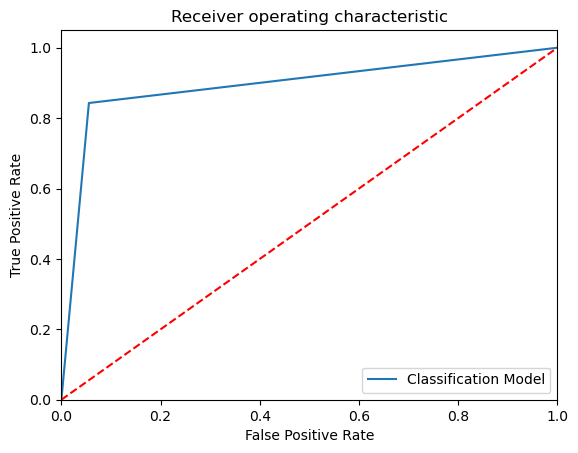

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 103   88]
 [ 199 1208]]
Outcome values : 
 103 88 199 1208
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.54      0.42       191
           0       0.93      0.86      0.89      1407

    accuracy                           0.82      1598
   macro avg       0.64      0.70      0.66      1598
weighted avg       0.86      0.82      0.84      1598

Accuracy : 82.0 %
Precision : 34.1 %
Recall : 53.9 %
F1 Score : 0.418
Specificity or True Negative Rate : 85.9 %
Balanced Accuracy : 69.9 %
MCC : 0.33
roc_auc_score: 0.699


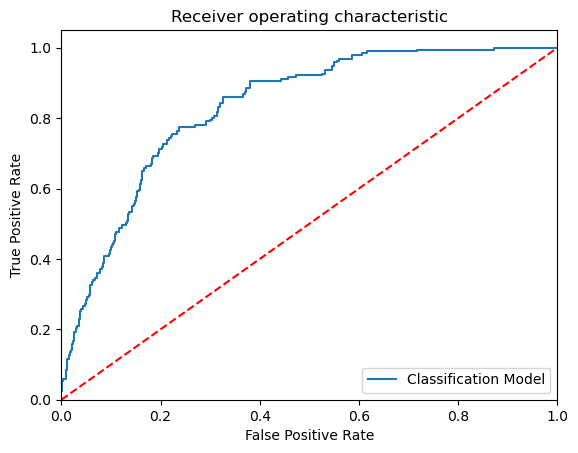

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)
Confusion matrix : 
 [[ 158   33]
 [ 398 1009]]
Outcome values : 
 158 33 398 1009
Classification report : 
               precision    recall  f1-score   support

           1       0.28      0.83      0.42       191
           0       0.97      0.72      0.82      1407

    accuracy                           0.73      1598
   macro avg       0.63      0.77      0.62      1598
weighted avg       0.89      0.73      0.78      1598

Accuracy : 73.0 %
Precision : 28.4 %
Recall : 82.7 %
F1 Score : 0.423
Specificity or True Negative Rate : 71.7 %
Balanced Accuracy : 77.2 %
MCC : 0.371
roc_auc_score: 0.772


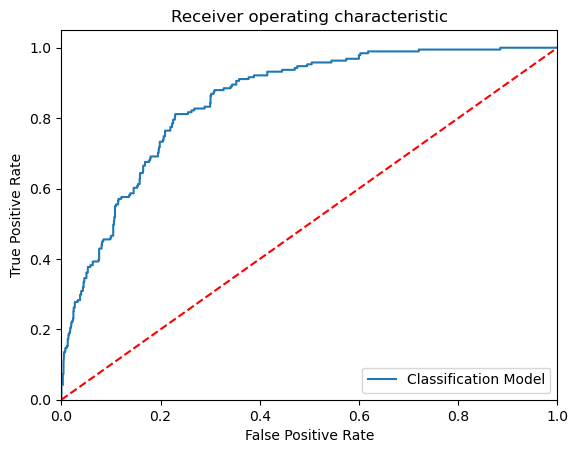

-----------------------------------------------------------------------------------------------------


In [159]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)
ModelGNB = GaussianNB()
ModelSVM = SVC(kernel='linear', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>


In [160]:
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),18,173,5,1402,0.889,0.783,0.094,0.168,0.996,0.247,0.545344,0.545
1,DecisionTreeClassifier(),158,33,90,1317,0.923,0.637,0.827,0.720,0.936,0.684,0.881630,0.882
2,"(DecisionTreeClassifier(max_features='sqrt', r...",152,39,7,1400,0.971,0.956,0.796,0.869,0.995,0.857,0.895418,0.896
3,"(ExtraTreeClassifier(random_state=252695875), ...",159,32,22,1385,0.966,0.878,0.832,0.855,0.984,0.836,0.908412,0.908
4,KNeighborsClassifier(n_neighbors=1),161,30,78,1329,0.932,0.674,0.843,0.749,0.945,0.716,0.893747,0.894
5,GaussianNB(),103,88,199,1208,0.820,0.341,0.539,0.418,0.859,0.330,0.698916,0.699
6,"SVC(class_weight='balanced', kernel='linear', ...",158,33,398,1009,0.730,0.284,0.827,0.423,0.717,0.371,0.772177,0.772


In [161]:
# Assuming you have also predicted using DecisionTreeClassifier(Model RF)
# Since having more accuracy we have choosen it for prediction
y_pred=ModelET.predict(x_test)

In [162]:
# Display the Final results by data frame 

Results = pd.DataFrame({ 'stroke_A':y_test, 'stroke_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = pd.DataFrame({'stroke_A': y_test, 'stroke_P': y_pred})

#Display 10 records randomly 
ResultsFinal.sample(10)

,stroke_A,stroke_P
1691,0,1
3714,0,0
62,1,1
3036,0,0
582,0,0
3674,0,0
12,1,0
568,0,0
468,0,0
718,0,0


In [163]:
# Display the Final results by merging duplicate file

Results=pd.DataFrame({'stroke_A':y_test,'stroke_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal=bsdata_bk.merge(Results,left_index=True,right_index=True)

#Display 10 records randomly

ResultsFinal.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_A,stroke_P
2585,Female,42.0,0,0,Yes,Private,Rural,84.60,27.0,smokes,0,0,0
693,Female,31.0,0,0,No,Private,Rural,91.08,34.3,never smoked,0,0,0
3459,Female,7.0,0,0,No,children,Urban,113.95,16.0,Unknown,0,0,0
1728,Female,3.0,0,0,No,children,Rural,77.87,18.3,Unknown,0,0,0
3714,Female,41.0,0,0,Yes,Private,Urban,92.14,29.6,formerly smoked,0,0,0
2138,Female,76.0,0,0,Yes,Self-employed,Urban,110.07,31.8,never smoked,0,0,0
4884,Female,60.0,1,0,Yes,Private,Urban,109.00,31.9,Unknown,0,0,0
1520,Male,70.0,0,0,Yes,Private,Urban,66.85,29.3,Unknown,0,0,0
3101,Male,9.0,0,0,No,children,Rural,61.75,16.2,Unknown,0,0,0
3550,Male,43.0,0,0,Yes,Govt_job,Rural,56.08,23.9,Unknown,0,0,0
